# MALIS 19.3 WPM_T9.2
# Datenanalyse der offenen Daten der Seattle Public Library (Checkouts), Teil 1: Frage 1 bis 4
Mit fünf verschiedenen Fragen werden die Checkout-Daten analysiert und die Lösungen implementiert. Hierfür werden die Checkout-Daten der Public Library des Jahres 2019 importiert. Für die ersten vier Fragen wird die Datenmenge auf 10.000 Zeilen begrenzt. Bei den sehr hohen Ausleihzahlen der Bibliothek bedeutet diese Einschränkung, dass nicht alle Checkouts des Monats Dezember wiedergegeben werden (s. Teil 2: Frage 5).

- Frage 1: Welches Medium wurde im Dezember 2019 am häufigsten ausgeliehen?
- Frage 2: Wie hoch ist die durchschnittliche Ausleihe der Public Library im Dezember 2019?
- Frage 3: Von welchem creator wurden im Dezember 2019 die meisten Medientitel ausgeliehen?
- Frage 4: Wurden im Dezember 2019 mehr digitale oder analoge Bücher und Hörbücher ausgeliehen?

### Erster Schritt: Packages importieren

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

### Zweiter Schritt: Checkout-Daten downloaden

In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000"
spl_file = "checkouts.csv"

In [3]:
# Überprüfen
spl_file

'checkouts.csv'

In [4]:
# Überprüfen
url

'https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000'

In [5]:
urllib.request.urlretrieve(url, spl_file)

('checkouts.csv', <http.client.HTTPMessage at 0x7f626abd8810>)

In [6]:
# Neue Variable erstellen:
ausleihen = pd.read_csv(spl_file)

In [7]:
ausleihen

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,AUDIOBOOK,2019,12,2,The Teenage Brain (Enchanced): A Neuroscientis...,Frances E. Jensen,"Nonfiction, Psychology",HarperCollins Publishers Inc.,2015
1,Physical,Horizon,BOOK,2019,12,3,Richard Scarry's Smokey the fireman.,"Scarry, Richard","Fire fighters Juvenile fiction, Animals Juveni...","Random House,",2015.
2,Physical,Horizon,BOOK,2019,12,1,Vernon Subutex : roman. Tome 1 / Virginie Desp...,"Despentes, Virginie, 1969-","Music stores France Paris Fiction, Businessmen...",Grasset : Les Éditions Graset & Fasquelle : Li...,janvier 2018.
3,Physical,Horizon,BOOK,2019,12,1,The lost Gospel of Mary : the Mother of Jesus ...,NaN,Mary Blessed Virgin Saint,"Paraclete Press,",[2007]
4,Digital,OverDrive,EBOOK,2019,12,2,"Be Mine Forever: Bennetts Series, Book 3",Kennedy Ryan,"Fiction, Literature, Romance","Hachette Digital, Inc.",2015
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2019,12,1,Artemisia Gentileschi : the image of the femal...,"Garrard, Mary D.",Gentileschi Artemisia 1593 1652 or 1653 Critic...,"Princeton University Press,",[1989]
9996,Digital,OverDrive,EBOOK,2019,12,1,"Birth of an Empire: Genghis Series, Book 1",Conn Iggulden,"Fiction, Historical Fiction","Random House, Inc.",2010
9997,Digital,OverDrive,EBOOK,2019,12,1,"An Affair Without End: Willowmere Series, Book 3",Candace Camp,"Fiction, Historical Fiction, Romance","Simon & Schuster, Inc.",2014
9998,Physical,Horizon,BOOK,2019,12,1,The vine basket / Josanne La Valley.,"La Valley, Josanne","Basket making Juvenile fiction, Fathers and da...","Clarion Books, Houghton Mifflin Harcourt,",[2013]


## 1. Frage: Welches Medium wurde im Dezember 2019 am häufigsten ausgeliehen?

In [8]:
# Bevor ich beginne: welche Datentypen enthält der Datensatz?
ausleihen.dtypes

usageclass         object
checkouttype       object
materialtype       object
checkoutyear        int64
checkoutmonth       int64
checkouts           int64
title              object
creator            object
subjects           object
publisher          object
publicationyear    object
dtype: object

In [9]:
# Wie lautet die Zahl der höchsten Ausleihe? Spalte: checkouts, Datentyp: integer
ausleihen.checkouts.max()

560

In [10]:
# Nun wird es spannend: Welches Medium hatte 560 Ausleihen? Gesucht wird die Zeile:
checkmax = ausleihen.checkouts.max()

In [11]:
# Zum Überprüfen:
checkmax

560

In [12]:
# Anzeigen der Zeile und somit des Mediums mit der höchsten Anzahl an Ausleihen
ausleihen[ausleihen.checkouts >= checkmax]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
7134,Physical,Horizon,BOOK,2019,12,560,The testaments / Margaret Atwood.,"Atwood, Margaret, 1939-","Surrogate mothers Fiction, Man woman relations...","Nan A. Talese/Doubleday,",[2019]


## Antwort auf die 1. Frage: Das analoge Buch "The testaments" von Margaret Atwood wurde am häufigsten ausgeliehen.

## 2. Frage: Wie hoch ist die durchschnittliche Ausleihe der Public Library im Dezember 2019?
Der im Dezember am häufigsten ausgeliehene Titel hat mit 560 Checkouts eine erstaunlich hohe Zahl. Es stellt sich die Frage, ob alle Medien der Stadtbibliothek in diesem Monat hohe Ausleihen hatten oder ob der Bestseller-Titel von Margaret Atwood ein sog. Ausreißer ist.

In [13]:
# Wie hoch war die durchschnittliche Ausleihe?
ausleihen.checkouts.mean()

3.652

## Antwort auf die 2. Frage: Die Zahl der durchschnittlichen Ausleihe betrug im Dezember 3,652.

In [14]:
# Und wie hoch war denn die geringste Ausleihe?
ausleihen.checkouts.min()

1

In [15]:
# Der Median wird nun wahrscheinlich zeigen, dass der Maximalwert 560 ein absoluter Ausreißer ist:
ausleihen.checkouts.median()

2.0

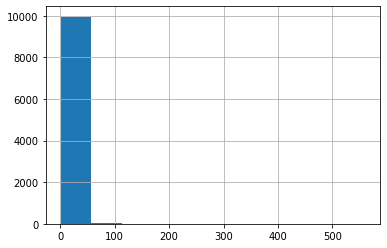

In [16]:
# Anzeigen aller Ausleihzahlen mit einem Historgramm (.hist):
ausleihen["checkouts"].hist()
# Warum zeigt das Histogramm nur einen Balken an??

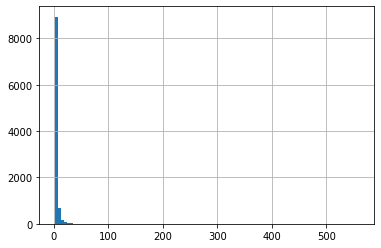

In [17]:
# Mit feinerer Auflösung plotten:
ausleihen["checkouts"].hist(bins=100)
# Doch richtig gemacht! Nun erkenne ich auch die schmale Linie rechts neben dem Balken im 1. Histogramm.

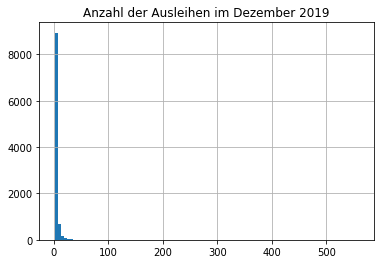

In [18]:
# Jetzt füge ich noch einen Titel hinzu:
ausleihen["checkouts"].hist(bins=100)
plt.title('Anzahl der Ausleihen im Dezember 2019')
plt.show()

## Fazit aus Frage 1 + 2:
Die durchschnittlichen Ausleihzahlen von Dezember 2019 entsprechen mit 3 - 4 Ausleihen (Mittelwert) bzw. 2 Ausleihen (Medien) pro Titel den üblichen Zahlen einer öffentlichen Bibliothek. Es wäre interessant nachzuforschen, wieso der Buchtitel "The testaments" von Atwood eine so hohe Ausleihzahl hatte oder ob es sich um einen Eingabefehler handelt.

## 3. Frage: Von welchem creator wurden im Dezember 2019 die meisten Medientitel ausgeliehen?
Gesucht wird der beliebteste creator (= Schöpfer oder Schöpferin von Werken wie Büchern oder Filmen), von dem am meisten Titel ausgeliehen wurden. Es wird nicht nach dem creator mit den meisten Ausleihen gefragt!

In [19]:
# Zunächst lasse ich mir die ersten und die letzten creator anzeigen:
ausleihen.creator.value_counts()

Patterson, James, 1947-                   20
James Patterson                           18
Nora Roberts                              13
M. C. Beaton                              12
Agatha Christie                           10
                                          ..
Sly & the Family Stone (Musical group)     1
Deborah Markus                             1
Packer, George, 1960-                      1
Taffy Brodesser-Akner                      1
John D. MacDonald                          1
Name: creator, Length: 7354, dtype: int64

## Antwort auf die 3. Frage: Das Ergebnis ist eindeutig - James Patterson war mit insgesamt 37 entliehenen Medientiteln der mit Abstand beliebteste creator im Dezember 2019.

### Wieso tauchen aber zwei unterschiedliche Schreibweisen des Autors auf? Aus meiner Erfahrung könnte die erste Schreibweise ("Patterson, James, 1947-") auf den Metadaten der analogen Medien und die 2. Schreibweise ("James Patterson") auf den Metadaten der digitalen Medien beruhen.

In [20]:
# Ich lasse mir die ersten und die letzten fünf creators der analogen Medien (Usageclass: 'Physical') anzeigen:
ausleihen[ausleihen.usageclass == 'Physical'].creator.value_counts()

Patterson, James, 1947-                 20
Seuss, Dr.                               9
Warner, Gertrude Chandler, 1890-1979     8
Keene, Carolyn                           7
Rylant, Cynthia                          7
                                        ..
Tormé, Mel, 1925-1999                    1
Stamper, Vesper                          1
Butcher, Jim, 1971-                      1
Brackmann, Lisa                          1
A-ha (Musical group)                     1
Name: creator, Length: 4345, dtype: int64

In [21]:
# Und die ersten und letzten fünf creators der digitalen Medien (Usageclass: 'Digital'):
ausleihen[ausleihen.usageclass == 'Digital'].creator.value_counts()

James Patterson      18
Nora Roberts         13
M. C. Beaton         12
Stephen King         10
Agatha Christie      10
                     ..
Eileen Behan          1
Tessa Afshar          1
Mark L. Chambers      1
Tahir Shah            1
John D. MacDonald     1
Name: creator, Length: 3010, dtype: int64

### Ergebnis: Meine Vermutung hat sich bestätigt, "James Patterson" sind die 17 digitalen und "Patterson, James, 1947-" die 20 analogen Medien.

## 4. Frage: Wurden im Dezember 2019 mehr digitale oder analoge Bücher und Hörbücher ausgeliehen?
In der Stadtbücherei Münster können die Kunden durch den Bibliotheksverbund muensterload.de immer mehr digitale Medien ausleihen, hier hauptsächlich eBooks und eAudios. Es überwiegen aber immer noch die analogen Bücher und Hörbücher. Wie sah dieses Verhältnis in der Seattle Public Library im Dezember 2019 aus?

In [22]:
# Welche Medientypen ("materialtype") gibt es überhaupt und wie viele jeweils ("value_counts"):
ausleihen.materialtype.value_counts()

BOOK                              4416
EBOOK                             2749
AUDIOBOOK                         1133
VIDEODISC                          883
SOUNDDISC                          746
REGPRINT                            23
MUSIC                               15
SOUNDDISC, VIDEODISC                 9
VIDEO                                9
ER                                   4
LARGEPRINT                           4
ER, SOUNDDISC                        3
ATLAS                                1
MUSICSNDREC                          1
SOUNDCASS, SOUNDDISC, SOUNDREC       1
VISUAL                               1
SOUNDREC                             1
CR                                   1
Name: materialtype, dtype: int64

### Zwischenfazit: In der Ausleihe überwiegen mit 4416 Titeln eindeutig die analogen Bücher (BOOKS) gegenüber den 2749 digitalen Büchern (EBOOK). Bei den Hörbüchern ist es andersherum: die digitalen Hörbücher (AUDIOBOOK) sind mit 1133 Titeln wesentlich häufiger vertreten als die analogen Hörbücher (SOUNDDISC) mit 746 Titeln.

In [23]:
# Zur Erinnerung: welcher Datentyp ist materialtype?
ausleihen.dtypes

usageclass         object
checkouttype       object
materialtype       object
checkoutyear        int64
checkoutmonth       int64
checkouts           int64
title              object
creator            object
subjects           object
publisher          object
publicationyear    object
dtype: object

### Zur besseren Veranschaulichung der vier Medientypen: Umsetzung der Verteilung von Books und Ebooks sowie Sounddiscs und Audiobooks in einem Kuchendiagramm mit Prozentzahlen

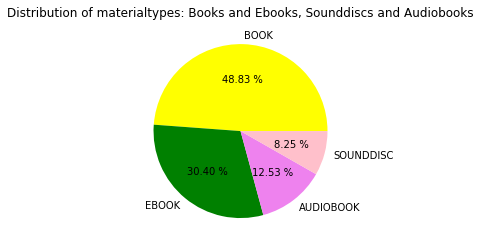

In [24]:
# Alle vier gewünschten Materialtypen als Variablen mit "loc" herausfiltern und mit "count()[0]" zählen:
BOOK = ausleihen.loc[ausleihen['materialtype'] == 'BOOK'].count()[0]
EBOOK = ausleihen.loc[ausleihen['materialtype'] == 'EBOOK'].count()[0]
AUDIOBOOK = ausleihen.loc[ausleihen['materialtype'] == 'AUDIOBOOK'].count()[0]
SOUNDDISC = ausleihen.loc[ausleihen['materialtype'] == 'SOUNDDISC'].count()[0]

# Beschriftung ("labels") und Farben ("colors") festlegen:
labels = ['BOOK', 'EBOOK', 'AUDIOBOOK', 'SOUNDDISC']
colors = ['yellow', 'green', 'violet', 'pink']

# Mit "plt.pie" festlegen, welche Materialtypen ich plotten will, Prozentangabe hinzufügen und Diagramm betiteln:
plt.pie([BOOK, EBOOK, AUDIOBOOK, SOUNDDISC], labels = labels, colors=colors, autopct='%.2f %%')
plt.title('Distribution of materialtypes: Books and Ebooks, Sounddiscs and Audiobooks')
plt.show()

## Antwort auf die 4. Frage: Das Kuchendiagramm zeigt anschaulich, dass in der Seattle Public Library im Dezember 2019  die analogen Bücher mit fast 50 % eindeutig überwiegen. Der Anteil der digitalen Bücher ist jedoch mit gut 30 % ebenfalls sehr hoch. Mit größerem Abstand folgen dann erst die digitalen Hörbücher (knapp 13 %) und die analogen Hörbücher (rund 8 %).